# 1. Problematique

#### Objectif du projet

L’objectif de cette étude de régression est de modéliser et prédire la variable cible `GDP_Growth` (croissance du PIB) en fonction de plusieurs variables économiques explicatives. Ces variables influencent souvent la croissance économique d’un pays, et l’analyse permet de mieux comprendre leur impact

#### Variables explicatives (features)
- `Inflation` : Variation des prix à la consommation. Une forte inflation peut ralentir la croissance.
- `Unemployment` (Chômage) : Taux de chômage. Plus il est élevé, plus il peut freiner l’économie.
- `InterestRate` (Taux d’intérêt) : Influence le coût du crédit et l’investissement.
- `StockIndex` : Représente la performance des marchés financiers, indicateur de confiance économique.
- `Consumption` : Niveau de consommation des ménages, moteur principal de la croissance dans beaucoup de pays.
#### Variable cible (target)
- `GDP_Growth` : Taux de croissance du produit intérieur brut. C’est cette variable qu’on cherche à expliquer et prédire.

In [44]:
# import des libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


# Données

#### Compréhension des variables

In [45]:
# import de la dataset
df = pd.read_csv("./DataSetMacroeconomy.csv")

In [46]:
# Affichage de la dataset
print("les 5 premières lignes de la dataset")
print("--"*20)
print(df.head())
print("\n")
print("les informations sur la dataset")
print("--"*20)
print(df.info())

les 5 premières lignes de la dataset
----------------------------------------
   Inflation  Unemployment  InterestRate  StockIndex  Consumption  GDP_Growth
0  -0.023393      0.009864      0.020669    0.118039    -0.013102    9.342510
1   0.014457      0.029486      0.032622    0.010095    -0.055811    4.438353
2  -0.085354      0.024369     -0.054953   -0.043139     0.008605   -3.654609
3   0.013763      0.000468      0.010809   -0.069074     0.063258   -5.069973
4  -0.044320     -0.037215      0.006751   -0.012972    -0.026977   -4.217522


les informations sur la dataset
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Inflation     500 non-null    float64
 1   Unemployment  500 non-null    float64
 2   InterestRate  500 non-null    float64
 3   StockIndex    500 non-null    float64
 4   Consumption 

> Le dataset contient 500 observations réparties sur 6 variables numériques, toutes de type float64. Aucune valeur manquante n’est présente (500 non-null pour chaque colonne), ce qui est idéal pour l’analyse.

# Prétraitement

#### Nettoyage (valeurs manquantes, doublons)

In [47]:
# affichage des valeurs manquantes
print("les valeurs manquantes")
print("--"*20)
print(df.isnull().sum())
print("\n")
print("les valeurs uniques")
print("--"*20)
print(df.nunique())
print("\n")
# affichage des types de données
print("les types de données")
print("--"*20)
print(df.dtypes)
print("\n")

les valeurs manquantes
----------------------------------------
Inflation       0
Unemployment    0
InterestRate    0
StockIndex      0
Consumption     0
GDP_Growth      0
dtype: int64


les valeurs uniques
----------------------------------------
Inflation       500
Unemployment    500
InterestRate    500
StockIndex      500
Consumption     500
GDP_Growth      500
dtype: int64


les types de données
----------------------------------------
Inflation       float64
Unemployment    float64
InterestRate    float64
StockIndex      float64
Consumption     float64
GDP_Growth      float64
dtype: object





#### Transformation des données  
Toutes les variables du dataset sont de type `float`, ce qui signifie qu’**aucune transformation n’est nécessaire à ce stade**.  
S’il y avait eu des variables de type `string` (catégorielles), nous aurions utilisé un **encodage comme `LabelEncoder`** pour les convertir en données numériques.

In [48]:
# normalisation des données
def normalize_data(df):
    # Normalisation des colonnes numériques
    for column in df.select_dtypes(include=[np.number]).columns:
        df[column] = (df[column] - df[column].mean()) / df[column].std()
    return df


### Séparation en X (features) et y (target)

In [49]:
y = df['GDP_Growth']
X = df.drop(['GDP_Growth'], axis=1)

# Analyse exploratoire

### Statistiques descriptives

In [50]:
print("\n")
print("les statistiques de la dataset")
print("--"*20)
print(df.describe())
print("\n")



les statistiques de la dataset
----------------------------------------
        Inflation  Unemployment  InterestRate  StockIndex  Consumption  \
count  500.000000    500.000000    500.000000  500.000000   500.000000   
mean    -0.001603     -0.001021      0.003218    0.000629     0.000337   
std      0.042751      0.038056      0.037218    0.040127     0.040656   
min     -0.136211     -0.117368     -0.097471   -0.119090    -0.130286   
25%     -0.030682     -0.027804     -0.022943   -0.026098    -0.026557   
50%     -0.003985      0.000776      0.001985    0.002010     0.002262   
75%      0.027250      0.024005      0.028304    0.026083     0.026422   
max      0.164951      0.107514      0.111157    0.118039     0.121931   

       GDP_Growth  
count  500.000000  
mean    -0.100211  
std      7.275342  
min    -20.293936  
25%     -5.073047  
50%     -0.041520  
75%      4.714064  
max     19.169798  




#### Corrélations

In [51]:
### matrice de correlation
print("la matrice de correlation")
print("--"*20)
correlation_matrix = df.corr()
print(correlation_matrix)
print("\n")

la matrice de correlation
----------------------------------------
              Inflation  Unemployment  InterestRate  StockIndex  Consumption  \
Inflation      1.000000     -0.068152     -0.095114   -0.055779     0.085710   
Unemployment  -0.068152      1.000000      0.216780    0.099699     0.111856   
InterestRate  -0.095114      0.216780      1.000000   -0.068496     0.088238   
StockIndex    -0.055779      0.099699     -0.068496    1.000000     0.038361   
Consumption    0.085710      0.111856      0.088238    0.038361     1.000000   
GDP_Growth     0.369726      0.492184      0.264464    0.342486     0.202835   

              GDP_Growth  
Inflation       0.369726  
Unemployment    0.492184  
InterestRate    0.264464  
StockIndex      0.342486  
Consumption     0.202835  
GDP_Growth      1.000000  




#### Visualisations (scatter plots, heatmaps)

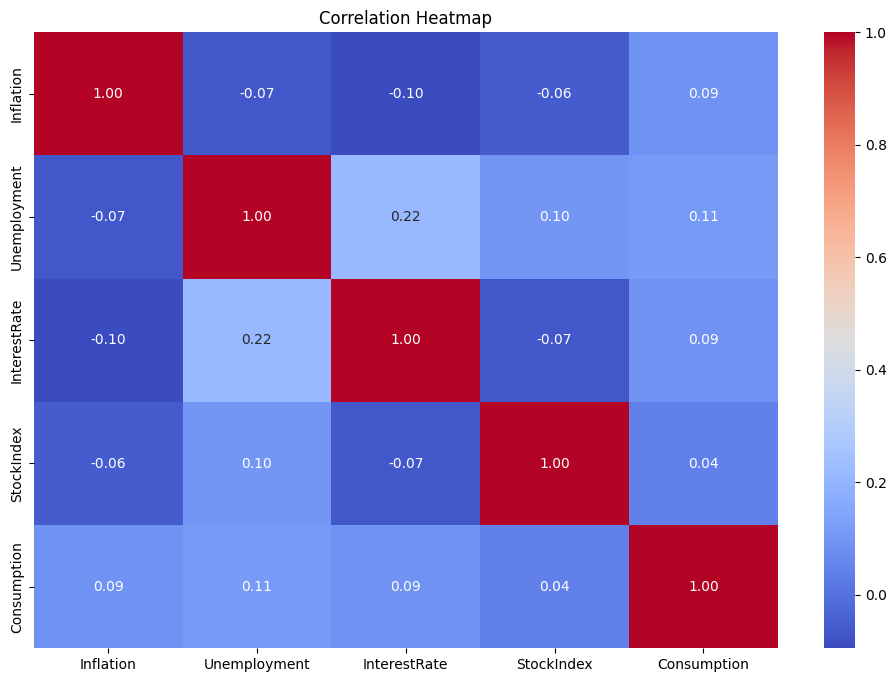

In [52]:
### visualisation de la matrice de correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(X.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

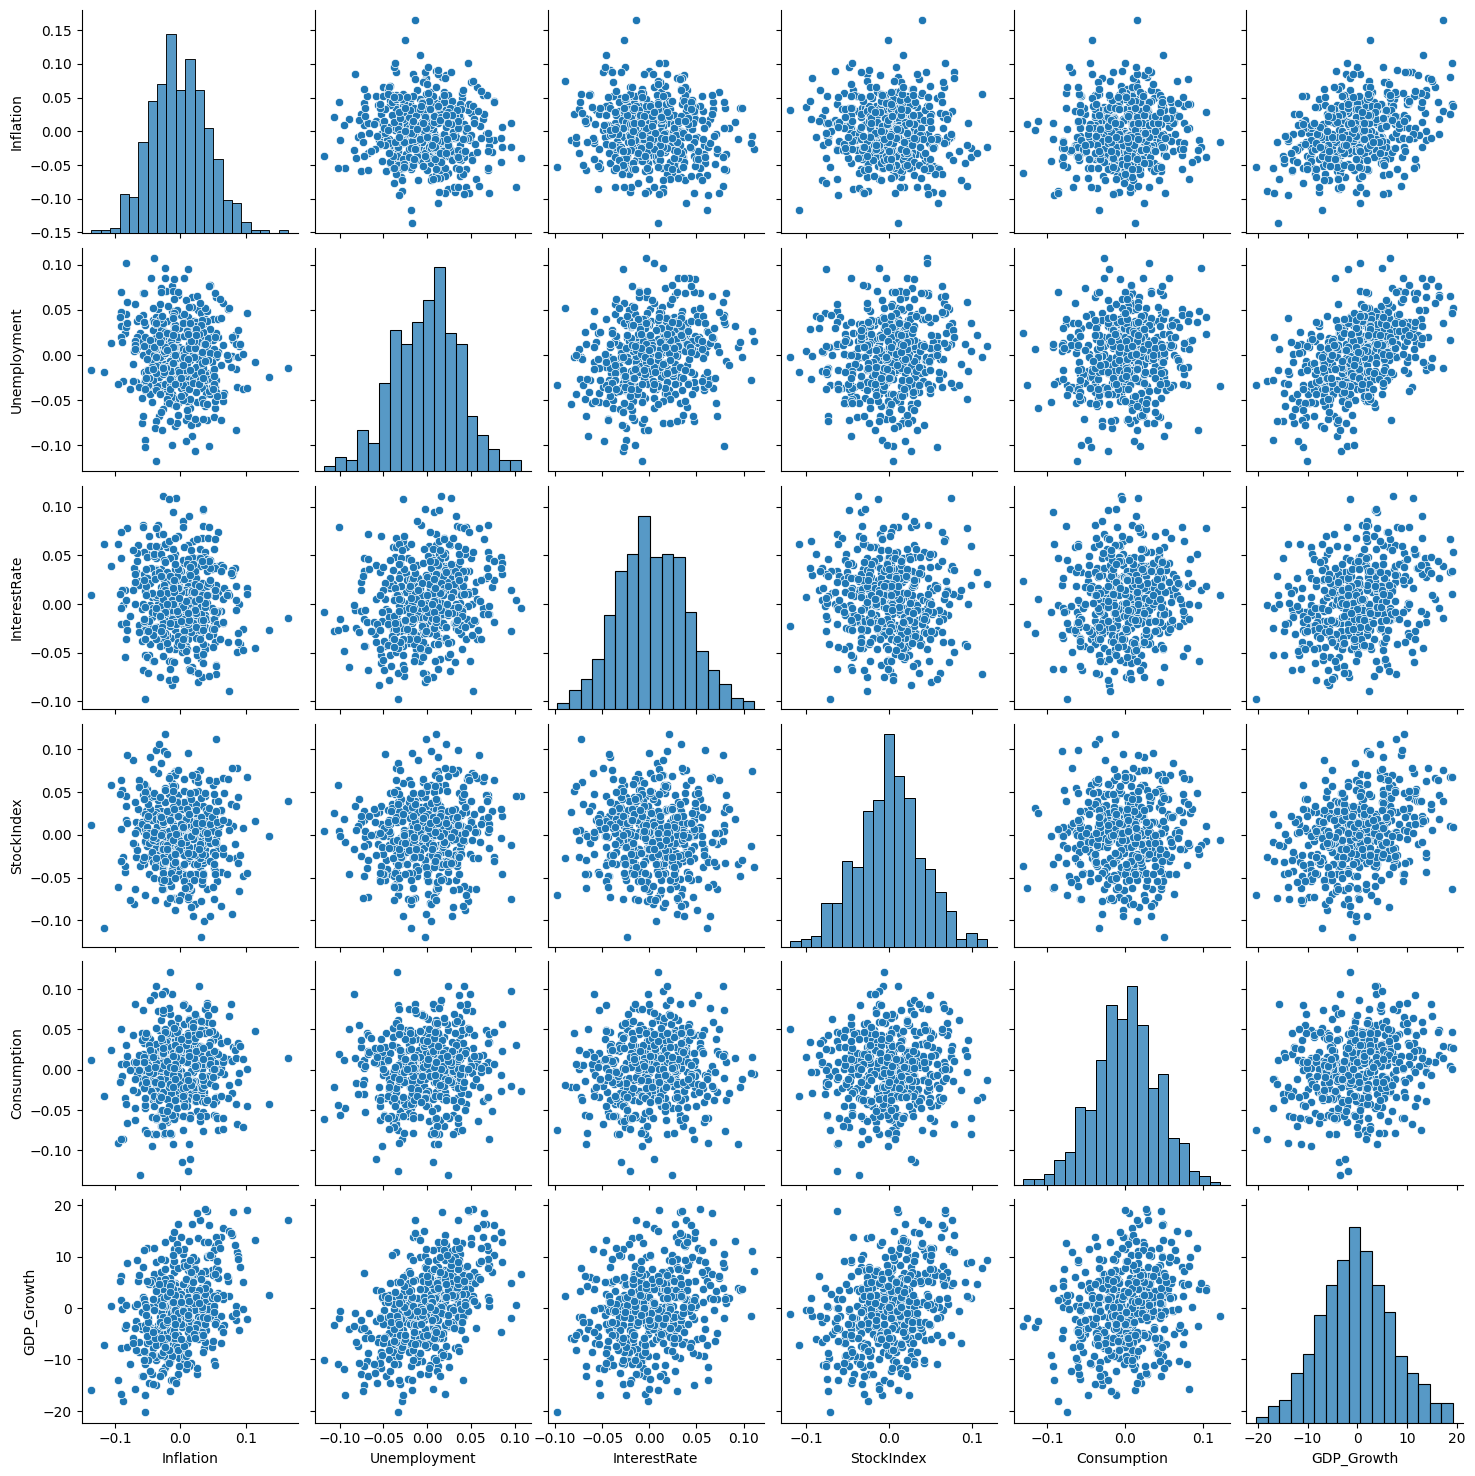

In [53]:
#  pairplot
sns.pairplot(df)
plt.show()

# Definition des fonctions pour faire la regression 

In [54]:
def add_constant(X):
    # Vérifie si X est un ndarray, sinon le convertir
    if isinstance(X, np.ndarray):
        intercept = np.ones((X.shape[0], 1))
        return np.hstack((intercept, X))
    else:
        # Si c'est un DataFrame
        X["intercept"] = 1
        return X

# regression linéaire
def Linear_Regression(X, y , intercept=True):
    if intercept:
        X = add_constant(X)
    # Calcul des coefficients de régression linéaire
    beta = np.linalg.inv(X.T @ X) @ X.T @ y
    return beta


# prediction
def predict(X, beta, intercept=True):
    if intercept:
        X = add_constant(X)
    # Prédiction des valeurs cibles
    X = X.to_numpy()
    beta = beta.to_numpy()
    y_pred = X @ beta
    return y_pred

# calcul de SCE
def SCR(y, y_pred):
    # Calcul de la somme des carrés des erreurs
    return np.sum((y - y_pred) ** 2)

def SCT(y):
    # Calcul de la somme totale des carrés
    return np.sum((y - np.mean(y)) ** 2)

def R2(y, y_pred):
    # Calcul du coefficient de détermination R^2
    return 1 - (SCR(y, y_pred) / SCT(y))

def adjusted_R2(y, y_pred, X, intercept=True):
    # Calcul du R^2 ajusté
    n = len(y)
    p = X.shape[1]
    if intercept:
        n -= 1 # Soustraire 1 si l'intercept est inclus
    return 1 - (1 - R2(y, y_pred)) * (n) / (n - p)

def std_error(y, y_pred, intercept=True):
    # Calcul de la sigma variance
    p = X.shape[1]
    n = len(y)
    if intercept:
         p -= 1 # Soustraire 1 si l'intercept est inclus 
    return np.sqrt(SCR(y, y_pred) / n - p)

def t_statistic(X, y, beta, intercept=True):
    # Calcul de la statistique t
    y_pred = predict(X, beta)
    sigma = std_error(y, y_pred, intercept)
    t_stat = beta / sigma
    return t_stat

def p_value(t_stat, n, p):
    # Calcul de la valeur p
    from scipy.stats import t as t_dist
    p_value = 2 * (1 - t_dist.cdf(np.abs(t_stat), df=n - p))
    return p_value

def f_statistic(X, y, beta, intercept=True):
    # Calcul de la statistique F
    y_pred = predict(X, beta)
    n = len(y)
    p = X.shape[1]
    if intercept:
        p -= 1 # Soustraire 1 si l'intercept est inclus
    f_stat = (SCR(y, y_pred) / p) / (SCR(y, y_pred) / (n - p))
    return f_stat

def f_p_value(f_stat, p, n):
    # Calcul de la valeur p pour la statistique F
    from scipy.stats import f as f_dist
    p_value = 1 - f_dist.cdf(f_stat, dfn=p, dfd=n - p)
    return p_value

# Fonction pour afficher les résultats de la régression
def display_results(X, y, beta, intercept=True):
    y_pred = predict(X, beta)
    n = len(y)
    p = X.shape[1]
    if intercept:
        p -= 1 # Soustraire 1 si l'intercept est inclus
    print("Coefficients de régression :")
    print(beta)
    print("\n")
 
    print("\n")
    print("R^2 :")
    r2 = R2(y, y_pred)
    print(r2)
    print("\n")
    print("R^2 ajusté :")
    adjusted_r2 = adjusted_R2(y, y_pred, X)
    print(adjusted_r2)
    print("\n")
    print("Erreur standard :")
    sigma = std_error(y, y_pred)
    print(sigma)
    print("\n")
    print("SCE :")
    scr = SCR(y, y_pred)
    print(scr)
    print("\n")
    print("SCT :")
    sct = SCT(y)
    print(sct)
    print("\n")
    print("Statistique t :")
    t_stat = t_statistic(X, y, beta)
    print(t_stat)
    print("\n")
    print("Valeurs p :")
    p_val = p_value(t_stat, n, p)
    print(p_val)
    print("\n")
    print("Statistique F :")
    f_stat = f_statistic(X, y, beta)
    print(f_stat)
    print("\n")
    print("Valeur p pour la statistique F :")
    f_p_val = f_p_value(f_stat, p, n)
    print(f_p_val)
  

## Premiere Regression 

In [55]:
# separer les données en train et test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [56]:
beta = Linear_Regression(X_train, y_train)
y_train_pred = predict(X_train, beta)
# y_test_pred = predict(X_test, beta)


In [57]:
# Affichage des résultats
display_results(X_train, y_train, beta)

Coefficients de régression :
0    69.236808
1    86.087286
2    43.976518
3    64.163077
4    10.697556
5    -0.148313
dtype: float64




R^2 :
0.5597217164409758


R^2 ajusté :
0.5529999105851129


Erreur standard :
4.217756047532044


SCE :
8715.786430597249


SCT :
19796.08523986807


Statistique t :
0    16.415555
1    20.410684
2    10.426520
3    15.212610
4     2.536315
5    -0.035164
dtype: float64


Valeurs p :
[0.         0.         0.         0.         0.01158689 0.97196686]


Statistique F :
79.0


Valeur p pour la statistique F :
1.1102230246251565e-16



###  **Conclusion de la régression linéaire**

Le modèle de régression permet d'expliquer environ **56 % de la variance du PIB (GDP_Growth)** à l’aide des variables économiques considérées, comme l’indique un **R² = 0.56** et un **R² ajusté = 0.553**. Cela suggère une qualité d’ajustement **modérée**, mais significative.

####  **Analyse des coefficients** :
- Les variables `Inflation`, `Unemployment`, `InterestRate` et `StockIndex` ont un **impact positif significatif** sur le PIB, avec des **valeurs p proches de 0** et des **statistiques t élevées**, indiquant qu'elles contribuent de manière importante au modèle.
- `Consumption` a un effet **positif faible mais significatif** (*p ≈ 0.011*).

#### **Statistiques globales** :
- L’**erreur standard** du modèle est **4.21**, ce qui donne une idée de la moyenne des écarts entre les valeurs prédites et les valeurs réelles.
- La **statistique F très élevée (79)** avec une **valeur p quasi nulle** montre que le modèle global est **hautement significatif**.


### **Conclusion générale**
Le modèle est statistiquement significatif, et plusieurs variables économiques ont un impact clair sur la croissance du PIB. On va tenter d'ameliorer le modele


# Amelioration 


### Multicolinéarité

La **multicolinéarité** entre variables explicatives peut rendre les coefficients instables et peu fiables.  
Pour la détecter, on utilise le **VIF (Variance Inflation Factor)** : un **VIF > 5** indique une colinéarité potentiellement problématique.


#### Détection avec le **VIF (Variance Inflation Factor)**

Pour détecter la présence de multicolinéarité, on utilise l’indicateur **VIF**, qui mesure à quel point la variance estimée d’un coefficient est augmentée à cause de la colinéarité :

- Un **VIF > 5** (ou parfois 10 selon les sources) peut indiquer une multicolinéarité problématique.
- Plus le VIF est élevé, plus la variable est redondante avec d’autres.

#### Solution : Régression Ridge

En présence de multicolinéarité, on peut recourir à la **régression Ridge** comme alternative à la régression linéaire classique.

**Pourquoi Ridge ?**
- Ridge ajoute une **pénalisation (ou régularisation)** aux coefficients du modèle via un terme **L2** (la somme des carrés des coefficients).
- Cela permet de **réduire la variance** des estimations tout en conservant toutes les variables explicatives.

**Principe** :
> Ridge minimise la somme des moindres carrés en ajoutant une pénalité :  
> $$ \text{min} \left( \sum (y_i - \hat{y}_i)^2 + \lambda \sum \beta_j^2 \right) $$
> où **λ** est un hyperparamètre qui contrôle la force de la régularisation.

####  Limites de Ridge :
- Ridge **ne supprime pas** les variables inutiles : il **réduit leurs coefficients sans les annuler** (contrairement à Lasso).
- Le choix de **λ (lambda)** est crucial et nécessite une **validation croisée**.
- En présence de nombreuses variables non pertinentes, Ridge peut ne pas améliorer l’interprétabilité.


Étape suivante : calculer les **VIFs**.


In [58]:
def calculate_vif(df):
   
    vifs = {}
    columns = df.columns

    for i in range(df.shape[1]):
        y = df.iloc[:, i]
        X = df.drop(columns[i], axis=1)

        beta = Linear_Regression(X, y)
        y_pred = predict(X, beta)
        r2 = R2(y, y_pred)
        vif = np.inf if r2 >= 1.0 else 1 / (1 - r2)
        vifs[columns[i]] = vif
        print(f"{columns[i]}: VIF = {vif:.4f}")

    return pd.Series(vifs).sort_values(ascending=False)

def remove_multicollinearity(X, y, threshold=10):
    """
    Supprime les colonnes avec une VIF supérieure au seuil spécifié.
    """
    vifs = calculate_vif(X)
    high_vif_columns = vifs[vifs > threshold].index.tolist()
    print(f"Colonnes supprimées en raison de la multicolinéarité : {high_vif_columns}")
    return X.drop(high_vif_columns, axis=1), y


In [59]:
remove_multicollinearity(X_train, y_train, threshold=10)

Inflation: VIF = 1.0223
Unemployment: VIF = 1.0607
InterestRate: VIF = 1.0782
StockIndex: VIF = 1.0286
Consumption: VIF = 1.0212
intercept: VIF = 0.0000
Colonnes supprimées en raison de la multicolinéarité : []


/var/folders/dl/6_227fz151s0zrcm0wrbn48c0000gn/T/ipykernel_4511/3109723755.py:41: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - (SCR(y, y_pred) / SCT(y))


(     Inflation  Unemployment  InterestRate  StockIndex  Consumption  intercept
 249  -0.046426     -0.042968      0.026935    0.001740    -0.011267          1
 433  -0.081953      0.059211      0.078560    0.093397     0.016850          1
 19    0.021713     -0.017861      0.003923   -0.081095     0.006864          1
 322   0.051770      0.007117      0.056315    0.021164     0.023759          1
 332   0.013413      0.007680     -0.024300   -0.014509     0.008189          1
 ..         ...           ...           ...         ...          ...        ...
 106  -0.011335     -0.003347      0.025578    0.001321    -0.020137          1
 270   0.048453     -0.007750     -0.003649    0.004675     0.047582          1
 348   0.164951     -0.014002     -0.014192    0.039786     0.014998          1
 435  -0.036875     -0.002356     -0.004298   -0.003971    -0.035097          1
 102  -0.037070     -0.072716      0.047291   -0.012762    -0.029647          1
 
 [400 rows x 6 columns],
 249   -12.22

> ## conclusion sur la multicolinéarité
Comme toutes les `VIF < 5 ` donc pas de multicolinearité

# Selection des variables

In [60]:
def corr_coef(X, y):
    corr = {}
    for column in X.columns:
        corr[column] = np.corrcoef(X[column], y)[0, 1]
    return pd.Series(corr).sort_values(ascending=False)

def coef_correlation_partielle(X, y, scr_precedente):
    beta = Linear_Regression(X, y)
    y_pred = predict(X, beta)
    scr = SCR(y, y_pred)
    return (scr - scr_precedente) / scr_precedente



def stat_f(X, y, scr_precedente, intercept=True):
    f_stat = {}
    for column in X.columns:
        X_temp = X.drop(column, axis=1)
        beta = Linear_Regression(X_temp, y, intercept)
        y_pred = predict(X_temp, beta, intercept)
        scr = SCR(y, y_pred)
        n = len(y)
        p = X_temp.shape[1]
        if intercept:
            p -= 1
        f_stat[column] = ((scr_precedente - scr) / 1) / (scr / (n - p))
    return pd.Series(f_stat).sort_values(ascending=False)


def method_progressive(X, y):
    selected_columns = []
    remaining_columns = X.columns.tolist()

    # Étape 1 : corrélation simple
    corr = corr_coef(X, y)
    selected = corr.idxmax()
    selected_columns.append(selected)
    remaining_columns.remove(selected)

    beta = Linear_Regression(X[[selected]], y)
    y_pred = predict(X[[selected]], beta)
    scr = SCR(y, y_pred)
    f = (1 - scr / 1) / (scr / (len(y) - 2))
    if p_value(f, 1, len(y) - 2) > 0.05:
        return selected_columns

    # Étapes suivantes
    while len(remaining_columns) > 0:
        scr_precedente = SCR(y, y_pred)

        # Tester les nouvelles variables candidates
        part_corrs = {}
        for col in remaining_columns:
            cols = selected_columns + [col]
            part_corrs[col] = coef_correlation_partielle(X[cols], y, scr_precedente)

        # Ajouter la meilleure variable
        column = pd.Series(part_corrs).sort_values(ascending=False).idxmax()
        beta = Linear_Regression(X[selected_columns + [column]], y)
        y_pred = predict(X[selected_columns + [column]], beta)
        f_stats = stat_f(X[selected_columns + [column]], y, scr_precedente)

        # Tester la significativité
        if p_value(f_stats[column], 1, len(y) - 2) > 0.05:
            return selected_columns
        else:
            selected_columns.append(column)
            remaining_columns.remove(column)

    return selected_columns

print("Méthode progressive :")
selected_columns = method_progressive(X_train, y_train)
print(selected_columns)


Méthode progressive :


/Users/salim/Desktop/Insea/S2/PARTIE 1/Regression Lineaire/projet/env/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/salim/Desktop/Insea/S2/PARTIE 1/Regression Lineaire/projet/env/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/var/folders/dl/6_227fz151s0zrcm0wrbn48c0000gn/T/ipykernel_4511/3109723755.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["intercept"] = 1
/var/folders/dl/6_227fz151s0zrcm0wrbn48c0000gn/T/ipykernel_4511/3109723755.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

['Unemployment', 'intercept', 'Consumption', 'InterestRate', 'StockIndex', 'Inflation']


In [61]:

#  calcule du levier : leverage
# Leverage est une mesure de l'influence d'une observation sur la régression
def calculate_leverage(X):
    X = add_constant(X)
    try:
        H = np.dot(X, np.linalg.inv(np.dot(X.T, X)))
        H = np.dot(H, X.T)
    except np.linalg.LinAlgError:
        # En cas de matrice singulière, utiliser la pseudo-inverse
        H = np.dot(X, np.linalg.pinv(np.dot(X.T, X))).dot(X.T)
        H = np.dot(H, X.T)
    return np.diag(H)

def standard_residuals(residuals, X):
    h = calculate_leverage(X)
    # Calcul des résidus standardisés
    std_residuals = residuals / np.sqrt((1 - h) * (np.var(residuals))) 
    return std_residuals   



def plot_homoscedasticity(y, y_pred):
    residuals = y - y_pred
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_pred, y=residuals)
    plt.axhline(0, color='red', linestyle='--')
    plt.xlabel('Prédictions')
    plt.ylabel('Résidus')
    plt.title('Homoscedasticité')
    plt.show()


def qq_plot(residuals_standardized):
    # Calculer les quantiles théoriques
    quantiles = np.linspace(0, 1, len(residuals_standardized))
    theoretical_quantiles = stats.t.ppf(quantiles, df=len(residuals_standardized)-1)
    
    # Trier les résidus
    sorted_residuals = np.sort(residuals_standardized)

    # Tracer le QQ plot
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=theoretical_quantiles, y=sorted_residuals)
    plt.plot([min(theoretical_quantiles), max(theoretical_quantiles)], [min(sorted_residuals), max(sorted_residuals)], color='red', linestyle='--')
    plt.xlabel('Quantiles théoriques')
    plt.ylabel('Quantiles des résidus')
    plt.title('QQ Plot des résidus')
    plt.show()
    

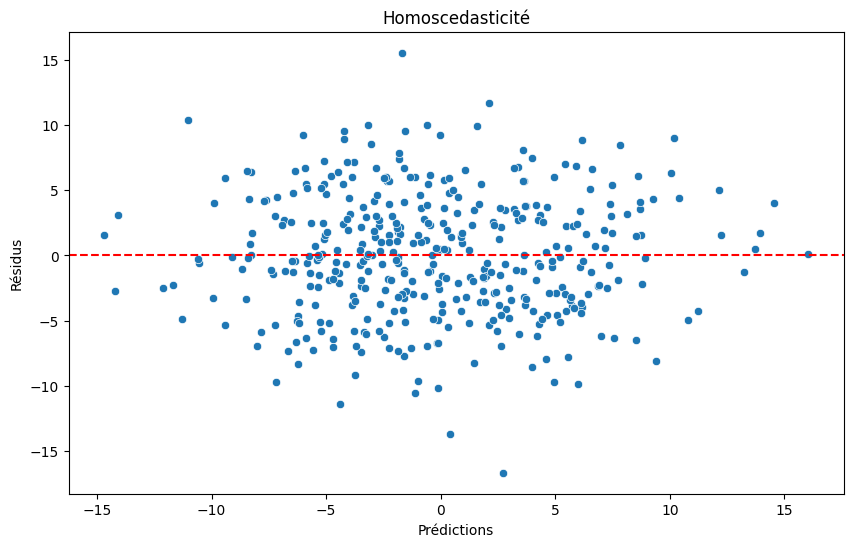

In [62]:
plot_homoscedasticity(y_train, y_train_pred)


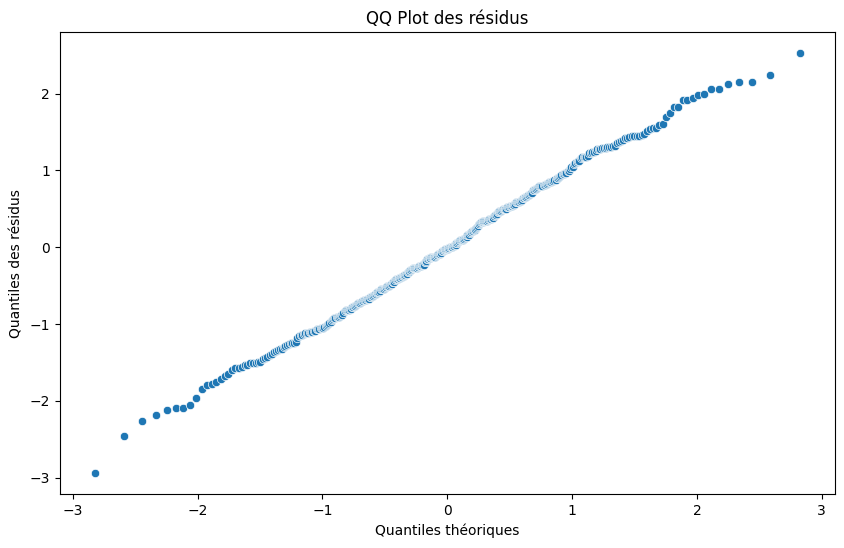

In [63]:
residuals = y_train - y_train_pred
residuals_standardized = standard_residuals(residuals, X_train)
qq_plot(residuals_standardized)

In [69]:
# methode regression avec scikit-learn
df = pd.read_csv("./DataSetMacroeconomy.csv")
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
# Normalisation des données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Création du modèle de régression linéaire
model = LinearRegression()
# Entraînement du modèle
model.fit(X_train, y_train)
# Prédiction sur les données de test
y_pred = model.predict(X_test)
# Calcul des métriques
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("MSE : ", mse)
print("R^2 : ", r2)
# Affichage des coefficients
print("Coefficients :")
print(model.coef_)
print("\n")
# affichage de vif


MSE :  28.67888896193365
R^2 :  0.5633795846356036
Coefficients :
[69.23680813 86.0872856  43.97651813 64.16307668 10.697556  ]


